In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def draw(x1,x2):
  ln=plt.plot(x1,x2)

def sigmoid(score):
  return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(2000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient
    
    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)
    
    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2) 

In [6]:
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
print(all_points)

line_parameters = np.matrix([np.zeros(3)]).T
print(line_parameters)
# x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
# x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
print(y)

[[13.52810469 12.28808714  1.        ]
 [10.80031442 14.90854701  1.        ]
 [11.95747597 13.52207545  1.        ]
 [14.4817864  12.24335003  1.        ]
 [13.73511598 12.88772647  1.        ]
 [ 8.04544424 12.66734865  1.        ]
 [11.90017684 14.98815815  1.        ]
 [ 9.69728558 11.58968347  1.        ]
 [ 9.7935623  12.6261354   1.        ]
 [10.821197   10.29180852  1.        ]
 [-0.10597963  6.30989485  1.        ]
 [ 6.30723719  6.75632504  1.        ]
 [ 6.7288724   4.2244285   1.        ]
 [ 3.51566996  2.03840706  1.        ]
 [ 9.53950925  5.3041757   1.        ]
 [ 2.09126865  6.31269794  1.        ]
 [ 5.09151703  8.46058136  1.        ]
 [ 4.6256323   8.4047597   1.        ]
 [ 8.06555843  5.22534637  1.        ]
 [ 7.93871754  5.3953945   1.        ]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


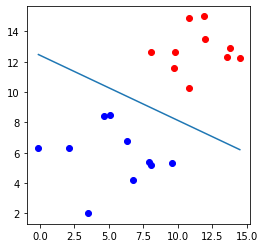

In [7]:
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()